### Score: `[42]`

Q1. `[14]` k12= 105/740 and k21= 102/900

Q2. `[19]` k12= 105/740 and k21= 102/900

Q3. `[5]` observations wrong

Q4. `[4]` missing observations 

In [32]:
#1.1
import numpy as np
import pandas as pd

# 尝试读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义 # NOTE: k12= 105/740 and k21= 102/900
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）

# 初始化数组
N1 = np.zeros(len(co2_global))
N2 = np.zeros(len(co2_global))
N1[0] = N1_0
N2[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程
for i in range(1, len(co2_global)):
    dN1_dt = -k12 * N1[i-1] + k21 * N2[i-1] + gamma
    dN2_dt = k12 * N1[i-1] - k21 * N2[i-1]
    N1[i] = N1[i-1] + dN1_dt * dt
    N2[i] = N2[i-1] + dN2_dt * dt

# 输出结果
print("Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004:")
for year, co2_level in zip(co2_global['year'], N1):
    print(f"{year}: {co2_level:.2f}")

Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004:
1987: 347.00
1988: 371.65
1989: 392.14
1990: 409.17
1991: 423.32
1992: 435.09
1993: 444.87
1994: 452.99
1995: 459.75
1996: 465.37
1997: 470.03
1998: 473.91
1999: 477.14
2000: 479.82
2001: 482.05
2002: 483.90
2003: 485.44
2004: 486.71


In [34]:
#1.2
import numpy as np
import pandas as pd

# 尝试读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）

# 初始化数组
N1 = np.zeros(len(co2_global))
N2 = np.zeros(len(co2_global))
N1[0] = N1_0
N2[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程，有缓冲效应，设置系数为0.02
for i in range(1, len(co2_global)):
    dN1_dt = -k12 * N1[i-1] + k21 * (N2_0 + 0.02 * (N2[i-1] - N2_0)) + gamma
    dN2_dt = k12 * N1[i-1] - k21 * (N2_0 + 0.02 * (N2[i-1] - N2_0))
    N1[i] = N1[i-1] + dN1_dt * dt
    N2[i] = N2[i-1] + dN2_dt * dt

# 输出结果
print("Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004 with Buffer Effect:")
for year, co2_level in zip(co2_global['year'], N1):
    print(f"{year}: {co2_level:.2f}")

Modeled Atmospheric CO2 Levels (ppm) from 1987 to 2004 with Buffer Effect:
1987: 347.00
1988: 371.65
1989: 393.86
1990: 413.87
1991: 431.90
1992: 448.15
1993: 462.79
1994: 475.97
1995: 487.86
1996: 498.56
1997: 508.21
1998: 516.90
1999: 524.74
2000: 531.79
2001: 538.15
2002: 543.88
2003: 549.04
2004: 553.69


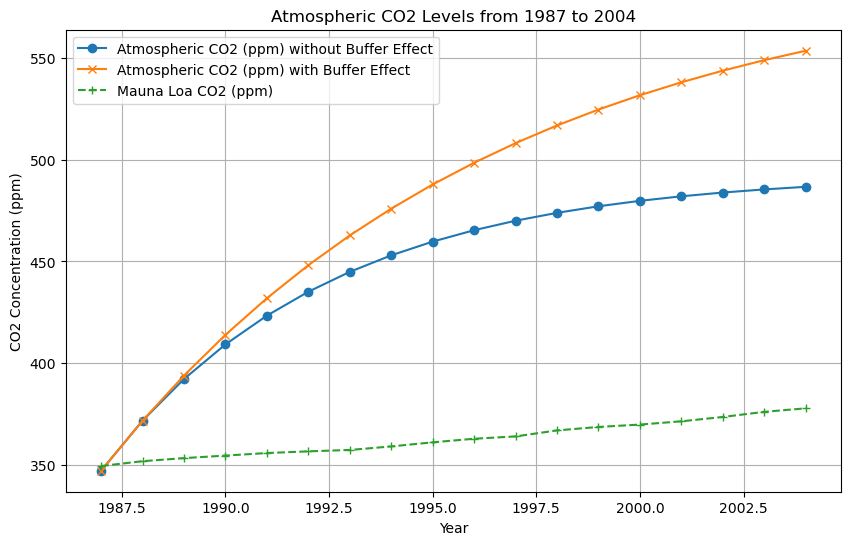

In [36]:
#1.3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
try:
    co2_global = pd.read_csv('co2_annmean_gl.csv')
    co2_mlo = pd.read_csv('co2_annmean_mlo.csv')
except Exception as e:
    print(f"读取文件时出现错误：{e}")
    exit()

# 提取1987年到2004年的数据
co2_global = co2_global[(co2_global['year'] >= 1987) & (co2_global['year'] <= 2004)]
co2_mlo = co2_mlo[(co2_mlo['year'] >= 1987) & (co2_mlo['year'] <= 2004)]

# 参数定义
k12 = 60 / 615  # 大气到海洋的转移速率常数
k21 = 60 / 842  # 海洋到大气的转移速率常数
gamma = 0  # 每年人为排放的CO2量（ppm/年），这里假设数据中已经包含了人为排放的影响
N1_0 = 347  # 1987年初大气中的CO2浓度（ppm）
N2_0 = 821  # 1987年初海洋中的CO2浓度（ppm）

# 初始化数组
N1_no_buffer = np.zeros(len(co2_global))
N2_no_buffer = np.zeros(len(co2_global))
N1_buffer = np.zeros(len(co2_global))
N2_buffer = np.zeros(len(co2_global))

N1_no_buffer[0] = N1_0
N2_no_buffer[0] = N2_0
N1_buffer[0] = N1_0
N2_buffer[0] = N2_0

# 时间步长
dt = 1  # 年

# 欧拉方法求解微分方程（无缓冲效应）
for i in range(1, len(co2_global)):
    dN1_dt = -k12 * N1_no_buffer[i-1] + k21 * N2_no_buffer[i-1] + gamma
    dN2_dt = k12 * N1_no_buffer[i-1] - k21 * N2_no_buffer[i-1]
    N1_no_buffer[i] = N1_no_buffer[i-1] + dN1_dt * dt
    N2_no_buffer[i] = N2_no_buffer[i-1] + dN2_dt * dt

# 欧拉方法求解微分方程（有缓冲效应）
for i in range(1, len(co2_global)):
    dN1_dt = -k12 * N1_buffer[i-1] + k21 * (N2_0 + 0.02 * (N2_buffer[i-1] - N2_0)) + gamma
    dN2_dt = k12 * N1_buffer[i-1] - k21 * (N2_0 + 0.02 * (N2_buffer[i-1] - N2_0))
    N1_buffer[i] = N1_buffer[i-1] + dN1_dt * dt
    N2_buffer[i] = N2_buffer[i-1] + dN2_dt * dt

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(co2_global['year'], N1_no_buffer, label='Atmospheric CO2 (ppm) without Buffer Effect', marker='o')
plt.plot(co2_global['year'], N1_buffer, label='Atmospheric CO2 (ppm) with Buffer Effect', marker='x')
plt.plot(co2_mlo['year'], co2_mlo['mean'], label='Mauna Loa CO2 (ppm)', linestyle='--', marker='+')

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Levels from 1987 to 2004')
plt.legend()
plt.grid(True)
plt.show()

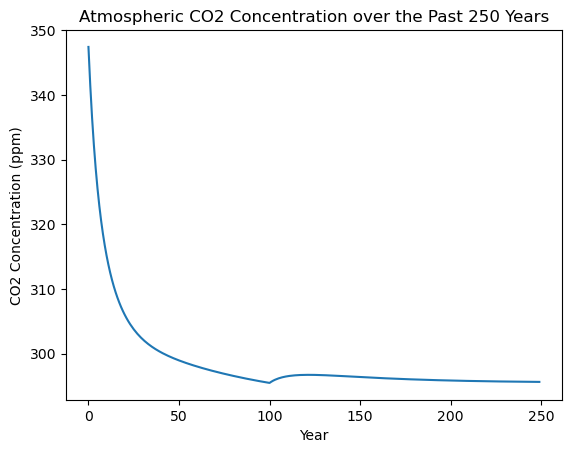

In [38]:
#2
import numpy as np
import matplotlib.pyplot as plt

# 定义模型参数
k12 = 60 / 615
k21 = 60 / 842
k23 = 9 / 842
k24 = 43 / 842
k32 = 52 / 9744
k34 = 162 / 9744
k43 = 205 / 26280
k45 = 0.2 / 26280
k51 = 0.2 / 90000000
k67 = 62 / 731
k71 = 62 / 1328
f0 = 62  # 前工业时代的净初级生产力
beta = 0.42  # 施肥因子

# 初始条件
N1_0 = 740  # 大气中的碳含量（PgC）
N2_0 = 900  # 表层海洋中的碳含量（PgC）
N3_0 = 9744  # 中层海洋中的碳含量（PgC）
N4_0 = 26280  # 深层海洋中的碳含量（PgC）
N5_0 = 90000000  # 沉积物中的碳含量（PgC）
N6_0 = 731  # 陆地生物圈中的碳含量（PgC）
N7_0 = 1328  # 土壤中的碳含量（PgC）

# 人类活动排放的CO2
gamma = 0  # 从1750年到1850年，人类活动排放的CO2为0
delta = 0  # 从1750年到1850年，土地利用变化排放的CO2为0

# 时间步长
dt = 1  # 年

# 初始化数组
N1 = np.zeros(250)
N2 = np.zeros(250)
N3 = np.zeros(250)
N4 = np.zeros(250)
N5 = np.zeros(250)
N6 = np.zeros(250)
N7 = np.zeros(250)

N1[0] = N1_0
N2[0] = N2_0
N3[0] = N3_0
N4[0] = N4_0
N5[0] = N5_0
N6[0] = N6_0
N7[0] = N7_0

# 模拟过去250年的大气CO2浓度
for i in range(1, 250):
    # 计算CO2浓度
    P = N1[i-1] / 2.13
    # 计算施肥因子
    f = f0 * (1 + beta * np.log(P / 289))
    # 计算CO2排放
    gamma = 0  # 从1750年到1850年，人类活动排放的CO2为0
    delta = 0  # 从1750年到1850年，土地利用变化排放的CO2为0
    if i > 100:  # 从1850年开始，人类活动和土地利用变化排放CO2
        gamma = 0.5  # 人类活动排放的CO2（PgC/年）
        delta = 0.2  # 土地利用变化排放的CO2（PgC/年）
    # 计算每个碳库的变化
    dN1_dt = -k12 * N1[i-1] + k21 * (N2_0 + (N2[i-1] - N2_0)) + gamma - f + k51 * N5[i-1] + k71 * N7[i-1]
    dN2_dt = k12 * N1[i-1] - k21 * (N2_0 + (N2[i-1] - N2_0)) - k23 * N2[i-1] + k32 * N3[i-1] - k24 * N2[i-1]
    dN3_dt = k23 * N2[i-1] - k32 * N3[i-1] - k34 * N3[i-1] + k43 * N4[i-1]
    dN4_dt = k34 * N3[i-1] - k43 * N4[i-1] + k24 * N2[i-1] - k45 * N4[i-1]
    dN5_dt = k45 * N4[i-1] - k51 * N5[i-1]
    dN6_dt = f - k67 * N6[i-1] - 2 * delta
    dN7_dt = k67 * N6[i-1] - k71 * N7[i-1] + delta
    # 更新每个碳库的碳含量
    N1[i] = N1[i-1] + dN1_dt * dt
    N2[i] = N2[i-1] + dN2_dt * dt
    N3[i] = N3[i-1] + dN3_dt * dt
    N4[i] = N4[i-1] + dN4_dt * dt
    N5[i] = N5[i-1] + dN5_dt * dt
    N6[i] = N6[i-1] + dN6_dt * dt
    N7[i] = N7[i-1] + dN7_dt * dt

# 计算大气CO2浓度
CO2_concentration = N1 / 2.13

# 绘制结果
plt.plot(CO2_concentration)
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Atmospheric CO2 Concentration over the Past 250 Years')
plt.show()